In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import PIL.Image
import os
import pathlib
from tensorflow.keras import layers , Sequential
from sklearn.model_selection import train_test_split

In [2]:
import pathlib
dataset_url = r"https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin=dataset_url,untar=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 442s 2us/step
C:\Users\dell\.keras\datasets\flower_photos


In [5]:
path = r"C:\Users\dell\.keras\datasets\flower_photos"
data_dir = pathlib.Path(path)
data_dir = data_dir / "flower_photos"
data_dir

WindowsPath('C:/Users/dell/.keras/datasets/flower_photos/flower_photos')

In [6]:
for i in data_dir.iterdir():
    print(i)
    

C:\Users\dell\.keras\datasets\flower_photos\flower_photos\daisy
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\dandelion
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\LICENSE.txt
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\roses
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\sunflowers
C:\Users\dell\.keras\datasets\flower_photos\flower_photos\tulips


In [7]:
flower_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflower" : list(data_dir.glob("sunflower/*")),
    "tulips" : list(data_dir.glob("tulips/*")), 
    }

In [8]:
batch_size = 32
img_size = (180, 180)

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
# Class labels
class_names = train_ds.class_names
print("Class Names:", class_names)

# Check a batch shape
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Class Names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Image batch shape: (32, 180, 180, 3)
Label batch shape: (32,)


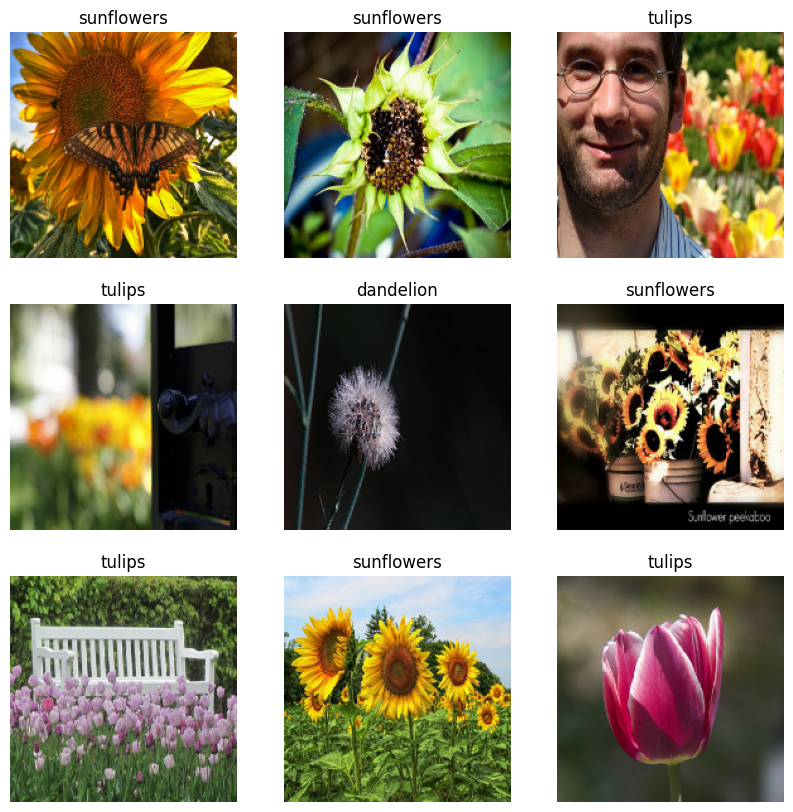

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
model = Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 flower classes
])

c:\Users\ksain\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,621 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=2
)

Epoch 1/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.3993 - loss: 1.4679 - val_accuracy: 0.5736 - val_loss: 1.0881
Epoch 2/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 78s 840ms/step - accuracy: 0.6056 - loss: 0.9896 - val_accuracy: 0.6049 - val_loss: 0.9735


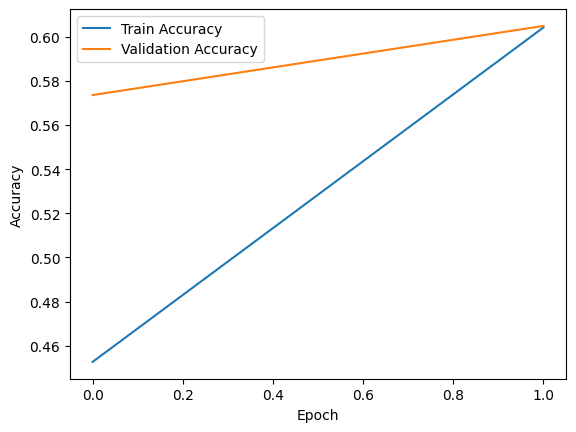

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()